<a href="https://colab.research.google.com/github/omkadam78/Bladder-cancer-project/blob/main/Googlecollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow opencv-python matplotlib


In [ ]:
from zipfile import ZipFile
import os

# Define ZIP file path
zip_path = "/content/Dataset 8.zip"

# Extract ZIP file
extract_path = "/content/data"
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)  # Extract contents

# List files inside extracted folder
files = os.listdir(extract_path)
print("Extracted files:", files)


Extracted files: ['WLI_split']


In [ ]:
import os

# Define extracted folder path
folder_path = "/content/data/WLI_split"

# List files inside the folder
files = os.listdir(folder_path)
print("Files inside WLI_split:", files)


Files inside WLI_split: ['test.zip', 'test', 'train']


In [ ]:
import os

# Paths to test and train directories
test_path = "/content/data/WLI_split/test"
train_path = "/content/data/WLI_split/train"

# List files inside each folder
print("Files in 'test':", os.listdir(test_path))
print("Files in 'train':", os.listdir(train_path))


Files in 'test': ['TA', 'Loop', 'Above T1', 'Hose', 'TURBT', 'Normal']
Files in 'train': ['TA', 'Loop', 'Above T1', 'Hose', 'TURBT', 'Normal']


In [ ]:
from zipfile import ZipFile

# Define test.zip path
test_zip_path = "/content/data/WLI_split/test.zip"

# Extract test.zip
with ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/data/WLI_split/test_extracted")

# Check extracted files
print("Extracted test.zip contents:", os.listdir("/content/data/WLI_split/test_extracted"))


Extracted test.zip contents: ['test']


In [ ]:
import os
import cv2
import numpy as np

# Define paths
train_path = "/content/data/WLI_split/train"
test_path = "/content/data/WLI_split/test"

# Function to load images and convert them to arrays
def load_images_from_folder(folder, img_size=(64, 64)):  # Resize images for consistency
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load in grayscale for PCA
        if img is not None:
            img = cv2.resize(img, img_size)  # Resize
            images.append(img.flatten())  # Flatten into 1D array
    return np.array(images)

# Load train and test images
train_images = load_images_from_folder(train_path)
test_images = load_images_from_folder(test_path)

# Check the shape of data
print("Train images shape:", train_images.shape)
print("Test images shape:", test_images.shape)


Train images shape: (0,)
Test images shape: (0,)


In [ ]:
dataset_path = "/content/data/WLI_split"

# List files in the dataset folder
print("Files in dataset:", os.listdir(dataset_path))


Files in dataset: ['test.zip', 'test', 'train', 'test_extracted']


In [ ]:
import os

dataset_path = "/content/data/WLI_split"

# Check folders
print("Contents of dataset:", os.listdir(dataset_path))

# Check inside test folder
test_path = os.path.join(dataset_path, "test")
print("Contents of test folder:", os.listdir(test_path))

# Check inside test_extracted
test_extracted_path = os.path.join(dataset_path, "test_extracted")
if os.path.exists(test_extracted_path):
    print("Contents of test_extracted:", os.listdir(test_extracted_path))


Contents of dataset: ['test.zip', 'test', 'train', 'test_extracted']
Contents of test folder: ['TA', 'Loop', 'Above T1', 'Hose', 'TURBT', 'Normal']
Contents of test_extracted: ['test']


In [ ]:
import os

test_extracted_inner = os.path.join("/content/data/WLI_split/test_extracted", "test")

# Check inside test_extracted/test
if os.path.exists(test_extracted_inner):
    print("Contents of test_extracted/test:", os.listdir(test_extracted_inner))
else:
    print("test_extracted/test does not exist!")


Contents of test_extracted/test: ['TA', 'Loop', 'Above T1', 'Hose', 'TURBT', 'Normal']


In [ ]:
import os
import numpy as np
from collections import Counter

# Define correct paths based on your directory structure
base_path = '.'  # Adjust this if needed
test_path = os.path.join(base_path, 'test')
train_path = os.path.join(base_path, 'train')

# First, verify the paths exist
print(f"Available directories: {os.listdir(base_path)}")

# Check if paths exist before proceeding
if not os.path.exists(train_path):
    print(f"Warning: '{train_path}' does not exist. Please check your directory structure.")
    # Try to find where the data might be
    possible_train_dirs = [d for d in os.listdir(base_path) if "train" in d.lower()]
    if possible_train_dirs:
        print(f"Possible training directories found: {possible_train_dirs}")

if not os.path.exists(test_path):
    print(f"Warning: '{test_path}' does not exist. Please check your directory structure.")
    # Try to find where the test data might be
    possible_test_dirs = [d for d in os.listdir(base_path) if "test" in d.lower()]
    if possible_test_dirs:
        print(f"Possible test directories found: {possible_test_dirs}")

Available directories: ['.config', 'data', 'Dataset 8.zip', 'sample_data']


In [ ]:
# Function to count samples in a directory
def count_samples(directory_path):
    if not os.path.exists(directory_path):
        return {}

    counts = {}
    try:
        for class_name in os.listdir(directory_path):
            class_dir = os.path.join(directory_path, class_name)
            if os.path.isdir(class_dir):
                counts[class_name] = len(os.listdir(class_dir))
    except Exception as e:
        print(f"Error reading {directory_path}: {e}")

    return counts

# Try to count samples in both train and test directories
train_counts = count_samples(train_path)
test_counts = count_samples(test_path)

# Print counts if available
if train_counts:
    print("\nTraining set class distribution:")
    for class_name, count in train_counts.items():
        print(f"{class_name}: {count} samples")
else:
    print("\nNo training data found in the expected location.")

if test_counts:
    print("\nTest set class distribution:")
    for class_name, count in test_counts.items():
        print(f"{class_name}: {count} samples")
else:
    print("\nNo test data found in the expected location.")


No training data found in the expected location.

No test data found in the expected location.


In [ ]:
from sklearn.model_selection import train_test_split
import shutil

# Only if you need to create a train set from test data
def create_train_set_from_test(test_dir, train_dir, split=0.7):
    if os.path.exists(train_dir):
        print(f"Train directory {train_dir} already exists.")
        return

    os.makedirs(train_dir, exist_ok=True)

    for class_name in os.listdir(test_dir):
        class_dir = os.path.join(test_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        # Create corresponding class directory in train
        train_class_dir = os.path.join(train_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)

        # Get all files
        all_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

        # Split files
        train_files, _ = train_test_split(all_files, train_size=split, random_state=42)

        # Copy files to train directory
        for file in train_files:
            shutil.copy(os.path.join(class_dir, file), os.path.join(train_class_dir, file))

    print(f"Train set created at {train_dir}")

# Use this function only if needed
# create_train_set_from_test(test_path, train_path)

Current directory contents: ['.config', 'data', 'Dataset 8.zip', 'sample_data']
Test directory not found either.
Found potential data directories in: ./data/WLI_split
  - Test directory: ./data/WLI_split/test
  - Train directory: ./data/WLI_split/train
Found potential data directories in: ./data/WLI_split/test_extracted
  - Test directory: ./data/WLI_split/test_extracted/test

Analyzing available data in test directory...

Test set class distribution:
TA: 22 samples
Loop: 44 samples
Above T1: 32 samples
Hose: 29 samples
TURBT: 91 samples
Normal: 32 samples


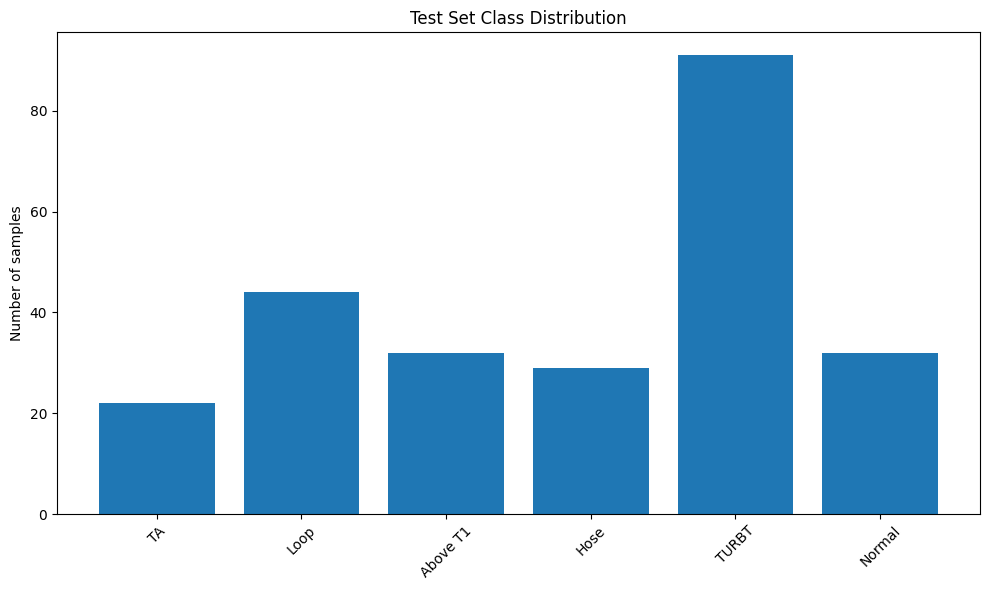

Test set imbalance ratio: 4.14
Loading images...
Loaded 250 images
Class mapping: {0: 'TA', 1: 'Loop', 2: 'Above T1', 3: 'Hose', 4: 'TURBT', 5: 'Normal'}
Split data: 175 training samples, 75 testing samples
Standardizing features...
Applying PCA...


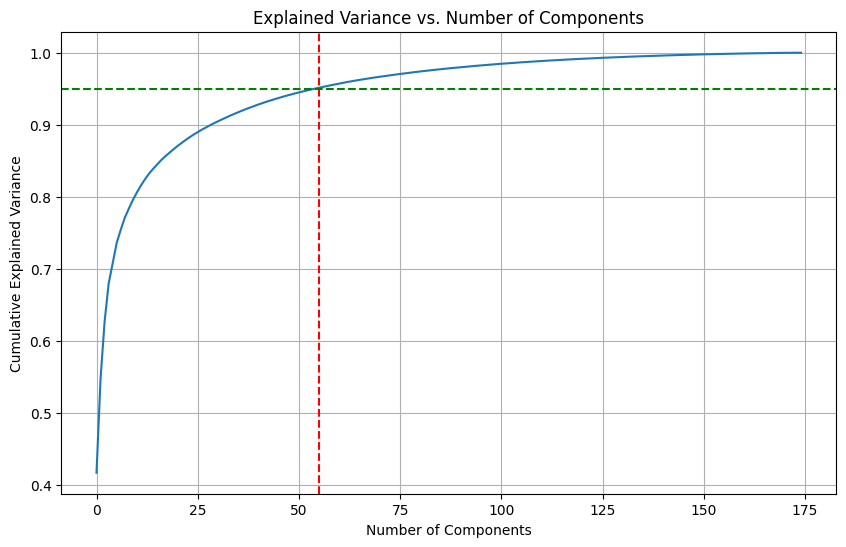

Number of components for 95% variance: 55
Original shape: (175, 150528)
Reduced shape: (175, 55)


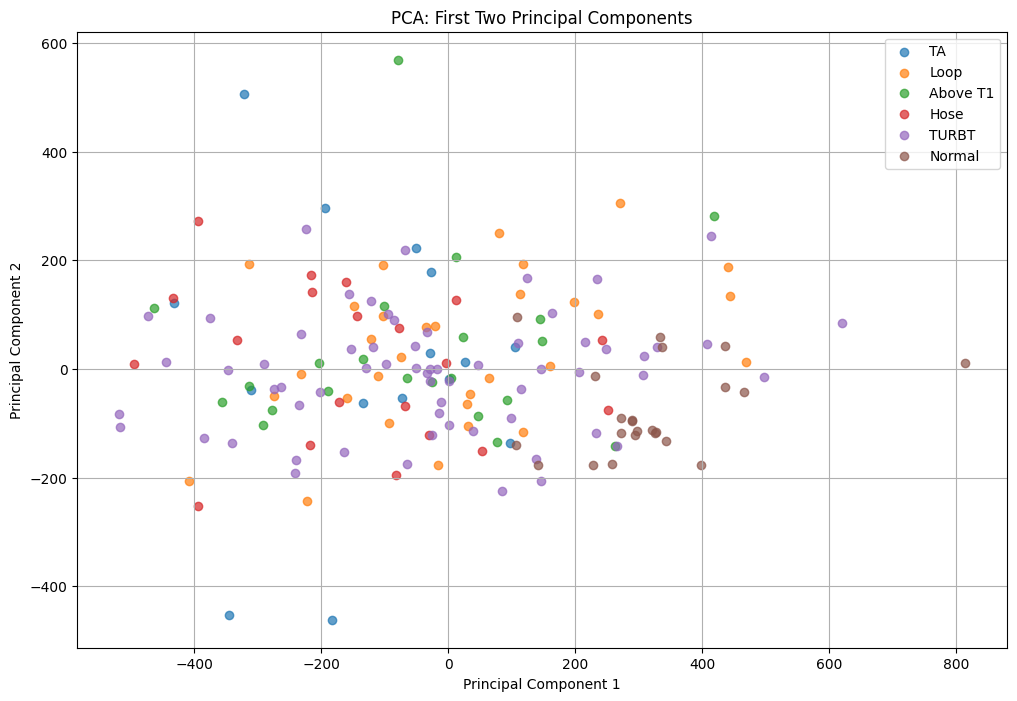

Training classifier...
Validation set performance:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

          TA       0.00      0.00      0.00         3
        Loop       1.00      0.50      0.67         6
    Above T1       0.67      0.50      0.57         4
        Hose       1.00      0.50      0.67         4
       TURBT       0.59      1.00      0.74        13
      Normal       1.00      1.00      1.00         5

    accuracy                           0.71        35
   macro avg       0.71      0.58      0.61        35
weighted avg       0.72      0.71      0.67        35



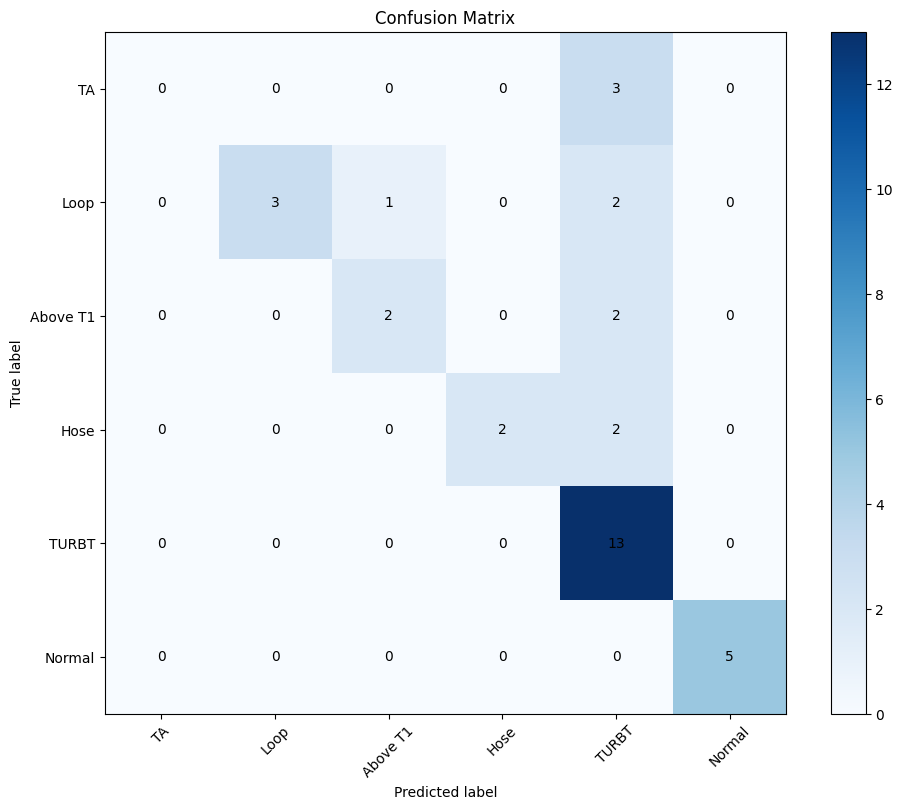

Performing cross-validation...
Cross-validation scores: [0.62857143 0.54285714 0.57142857 0.57142857 0.62857143]
Mean CV accuracy: 0.5886 ± 0.0343
Evaluating on test set...
Test set performance:
              precision    recall  f1-score   support

          TA       0.00      0.00      0.00         7
        Loop       0.00      0.00      0.00        13
    Above T1       0.40      0.40      0.40        10
        Hose       1.00      0.11      0.20         9
       TURBT       0.48      0.96      0.64        27
      Normal       0.86      0.67      0.75         9

    accuracy                           0.49        75
   macro avg       0.46      0.36      0.33        75
weighted avg       0.45      0.49      0.40        75



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


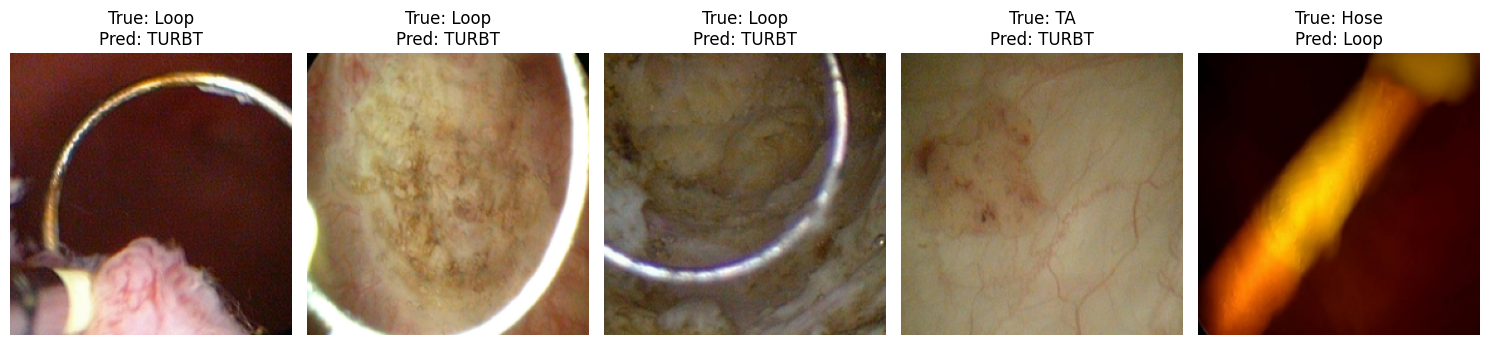

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# First, let's see what's actually available in the current directory
print("Current directory contents:", os.listdir('.'))

# Based on your earlier message, you have:
# ['test.zip', 'test', 'train', 'test_extracted']
# But the error suggests './train' doesn't exist

# Let's check if we can access the test directory at least
test_path = './test'
if os.path.exists(test_path):
    print(f"Test directory exists. Contains: {os.listdir(test_path)}")
else:
    print("Test directory not found either.")

    # Try to find where your data might be
    for root, dirs, files in os.walk('.'):
        if 'test' in dirs or 'train' in dirs:
            print(f"Found potential data directories in: {root}")
            if 'test' in dirs:
                print(f"  - Test directory: {os.path.join(root, 'test')}")
                test_path = os.path.join(root, 'test')
            if 'train' in dirs:
                print(f"  - Train directory: {os.path.join(root, 'train')}")
                train_path = os.path.join(root, 'train')

# Let's try to work with just the test directory for now
# If we can't find train, we'll split test into train/validation/test
if os.path.exists(test_path):
    # Option 1: Use test for analysis and split it for validation
    print("\nAnalyzing available data in test directory...")

    # Check class balance in test directory
    test_counts = {}
    for class_name in os.listdir(test_path):
        class_dir = os.path.join(test_path, class_name)
        if os.path.isdir(class_dir):
            test_counts[class_name] = len(os.listdir(class_dir))

    print("\nTest set class distribution:")
    for class_name, count in test_counts.items():
        print(f"{class_name}: {count} samples")

    # Visualize test distribution
    plt.figure(figsize=(10, 6))
    plt.bar(test_counts.keys(), test_counts.values())
    plt.title('Test Set Class Distribution')
    plt.xticks(rotation=45)
    plt.ylabel('Number of samples')
    plt.tight_layout()
    plt.show()

    # Calculate imbalance ratio
    test_imbalance_ratio = max(test_counts.values()) / min(test_counts.values())
    print(f"Test set imbalance ratio: {test_imbalance_ratio:.2f}")

    # Feature Extraction and Data Preparation
    def load_images(folder_path, img_size=(224, 224)):
        images = []
        labels = []
        label_map = {}

        for i, class_name in enumerate(os.listdir(folder_path)):
            class_dir = os.path.join(folder_path, class_name)
            if os.path.isdir(class_dir):
                label_map[i] = class_name
                for img_name in os.listdir(class_dir):
                    img_path = os.path.join(class_dir, img_name)
                    try:
                        img = cv2.imread(img_path)
                        if img is not None:
                            img = cv2.resize(img, img_size)
                            images.append(img)
                            labels.append(i)
                        else:
                            print(f"Warning: Could not load {img_path}")
                    except Exception as e:
                        print(f"Error loading {img_path}: {e}")

        return np.array(images), np.array(labels), label_map

    # Load all test images
    print("Loading images...")
    X_all, y_all, label_map = load_images(test_path)
    print(f"Loaded {len(X_all)} images")
    print(f"Class mapping: {label_map}")

    # Since we don't have separate train and test, let's split this data
    X_train, X_test, y_train, y_test = train_test_split(
        X_all, y_all, test_size=0.3, random_state=42, stratify=y_all
    )

    print(f"Split data: {len(X_train)} training samples, {len(X_test)} testing samples")

    # Flatten images for PCA
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # Standardize features
    print("Standardizing features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_flat)
    X_test_scaled = scaler.transform(X_test_flat)

    # Apply PCA
    print("Applying PCA...")
    pca = PCA()
    pca.fit(X_train_scaled)

    # Plot explained variance
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.title('Explained Variance vs. Number of Components')

    # Find number of components for 95% variance
    n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
    plt.axvline(x=n_components, color='r', linestyle='--')
    plt.axhline(y=0.95, color='g', linestyle='--')
    plt.show()

    print(f"Number of components for 95% variance: {n_components}")

    # Apply PCA with the optimal number of components
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    print(f"Original shape: {X_train_scaled.shape}")
    print(f"Reduced shape: {X_train_pca.shape}")

    # Visualize the first two principal components
    plt.figure(figsize=(12, 8))
    for i, class_name in label_map.items():
        mask = y_train == i
        plt.scatter(X_train_pca[mask, 0], X_train_pca[mask, 1], label=class_name, alpha=0.7)

    plt.title('PCA: First Two Principal Components')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Validation
    X_train_sub, X_val, y_train_sub, y_val = train_test_split(
        X_train_pca, y_train, test_size=0.2, random_state=42, stratify=y_train
    )

    print("Training classifier...")
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_sub, y_train_sub)

    # Evaluate on validation set
    y_val_pred = clf.predict(X_val)

    print("Validation set performance:")
    print(classification_report(y_val, y_val_pred, target_names=list(label_map.values())))

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_val, y_val_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(label_map))
    plt.xticks(tick_marks, label_map.values(), rotation=45)
    plt.yticks(tick_marks, label_map.values())

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha='center', va='center')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    # Cross-validation
    print("Performing cross-validation...")
    cv_scores = cross_val_score(clf, X_train_pca, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

    # Evaluate on test set
    print("Evaluating on test set...")
    y_test_pred = clf.predict(X_test_pca)

    print("Test set performance:")
    print(classification_report(y_test, y_test_pred, target_names=list(label_map.values())))

    # Analyze misclassifications
    misclassified = np.where(y_test != y_test_pred)[0]

    if len(misclassified) > 0:
        plt.figure(figsize=(15, 5))
        num_to_show = min(5, len(misclassified))
        for i in range(num_to_show):
            idx = misclassified[i]
            plt.subplot(1, num_to_show, i+1)
            plt.imshow(cv2.cvtColor(X_test[idx], cv2.COLOR_BGR2RGB))
            plt.title(f"True: {label_map[y_test[idx]]}\nPred: {label_map[y_test_pred[idx]]}")
            plt.axis('off')
        plt.tight_layout()
        plt.show()
else:
    print("Error: Could not find any usable dataset directories.")

In [ ]:
import os

# First, let's examine the current directory
print("Current directory:", os.getcwd())
print("Contents of current directory:", os.listdir('.'))

# Let's search for the data directories
data_paths = {}
for root, dirs, files in os.walk('.'):
    if 'test' in dirs:
        data_paths['test'] = os.path.join(root, 'test')
    if 'train' in dirs:
        data_paths['train'] = os.path.join(root, 'train')
    if 'test_extracted' in dirs:
        data_paths['test_extracted'] = os.path.join(root, 'test_extracted')
    if 'test.zip' in files:
        data_paths['test_zip'] = os.path.join(root, 'test.zip')

print("\nFound data paths:")
for key, path in data_paths.items():
    print(f"{key}: {path}")
    if os.path.exists(path):
        print(f"  Exists: Yes")
        # If it's a directory, list its contents
        if os.path.isdir(path):
            try:
                contents = os.listdir(path)
                print(f"  Contents: {contents}")
            except Exception as e:
                print(f"  Cannot list contents: {e}")
    else:
        print(f"  Exists: No")

Current directory: /content
Contents of current directory: ['.config', 'data', 'Dataset 8.zip', 'sample_data']

Found data paths:
test: ./data/WLI_split/test_extracted/test
  Exists: Yes
  Contents: ['TA', 'Loop', 'Above T1', 'Hose', 'TURBT', 'Normal']
train: ./data/WLI_split/train
  Exists: Yes
  Contents: ['TA', 'Loop', 'Above T1', 'Hose', 'TURBT', 'Normal']
test_extracted: ./data/WLI_split/test_extracted
  Exists: Yes
  Contents: ['test']
test_zip: ./data/WLI_split/test.zip
  Exists: Yes


Using dataset from: ./data/WLI_split/test
Loaded 250 images


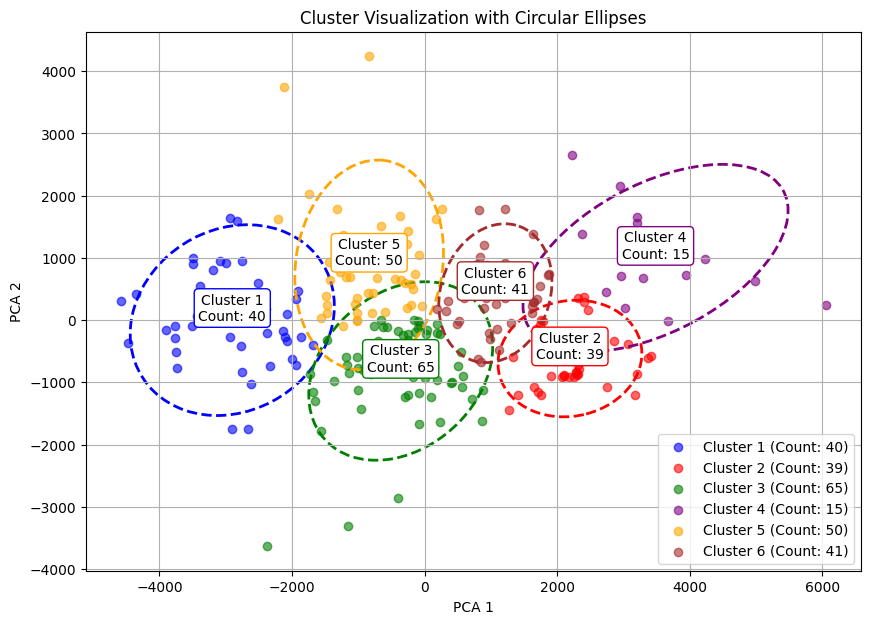

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse

# **Load and Preprocess Images**
def load_images(folder_path, img_size=(64, 64)):
    images = []
    labels = []
    label_map = {}

    for i, class_name in enumerate(os.listdir(folder_path)):
        class_dir = os.path.join(folder_path, class_name)
        if os.path.isdir(class_dir):
            label_map[i] = class_name
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, img_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
                    images.append(img.flatten())  # Flatten the image
                    labels.append(i)

    return np.array(images), np.array(labels), label_map

# **Find Dataset Path**
def find_data_path():
    possible_dirs = ['test', 'train', 'dataset', 'images']
    for root, dirs, _ in os.walk('.'):
        for d in dirs:
            if d in possible_dirs:
                return os.path.join(root, d)
    return None

data_path = find_data_path()

if data_path is None:
    raise FileNotFoundError("Dataset directory not found!")

print(f"Using dataset from: {data_path}")

# **Load Images**
X_all, y_all, label_map = load_images(data_path)
print(f"Loaded {len(X_all)} images")

# **Reduce Dimensionality with PCA**
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_all)

# **Clustering with K-Means**
n_clusters = 6  # You can adjust this number
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_pca)

# **Plot Clusters with Circular Ellipses**
plt.figure(figsize=(10, 7))

colors = ['blue', 'red', 'green', 'purple', 'orange', 'brown']
for i in range(n_clusters):
    cluster_points = X_pca[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1} (Count: {len(cluster_points)})", alpha=0.6, color=colors[i])

    # **Draw Ellipse for Each Cluster**
    if len(cluster_points) > 1:
        mean = np.mean(cluster_points, axis=0)
        cov = np.cov(cluster_points, rowvar=False)
        lambda_, v = np.linalg.eig(cov)
        lambda_ = np.sqrt(lambda_)

        ellipse = Ellipse(xy=mean, width=lambda_[0]*4, height=lambda_[1]*4, angle=np.rad2deg(np.arccos(v[0, 0])),
                          edgecolor=colors[i], facecolor='none', linestyle='dashed', linewidth=2)
        plt.gca().add_patch(ellipse)

        # **Annotate Cluster Centers**
        plt.annotate(f'Cluster {i+1}\nCount: {len(cluster_points)}', xy=mean, ha='center', bbox=dict(boxstyle="round,pad=0.3", edgecolor=colors[i], facecolor="white"))

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Cluster Visualization with Circular Ellipses")
plt.legend()
plt.grid(True)
plt.show()


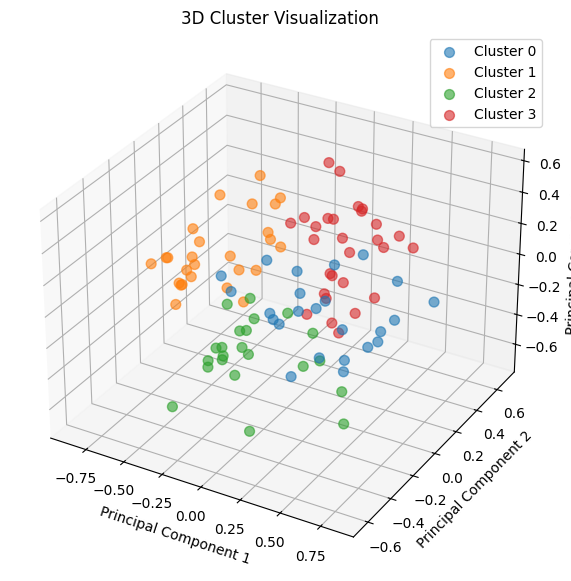

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Generate sample data (replace this with real dataset)
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features

# Reduce dimensions to 3D using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with cluster labels
for cluster in range(num_clusters):
    mask = labels == cluster
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], X_pca[mask, 2], label=f'Cluster {cluster}', s=50, alpha=0.6)

# Labeling
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D Cluster Visualization")

# Show legend
ax.legend()
plt.show()


In [38]:
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Generate sample data (Replace with your dataset)
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 samples, 5 features

# Reduce to 3D using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Convert to DataFrame for Plotly
import pandas as pd
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df['Cluster'] = labels.astype(str)  # Convert to string for coloring

# Create interactive 3D scatter plot
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
                     color='Cluster', opacity=0.8,
                     title="Interactive 3D Cluster Visualization")

# Show the figure
fig.show()
